In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_7.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_7.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,2.610608e-11,1.397427e-09,3.607684e-11,0.863420,2.022480e-11,2.893202e-13,0.000001,1.323474e-09,...,3.031280e-09,8.142006e-28,8.712544e-17,1.324736e-17,2.847447e-08,1.149972e-05,-8.404976e-04,5.814314e-27,3.662500e-27,2.354438e-28
1,0.000017,0.405009,1.011965e-10,2.662888e-09,1.364352e-10,0.863420,7.789574e-11,2.148552e-12,0.000002,5.291063e-09,...,6.587960e-09,4.191201e-27,1.976912e-16,4.017779e-17,4.325894e-08,1.178630e-05,-8.407172e-04,4.107842e-26,2.586490e-26,1.714075e-27
2,0.000025,0.405009,2.206981e-10,3.809313e-09,2.902053e-10,0.863420,1.686499e-10,6.978986e-12,0.000004,1.190114e-08,...,1.131649e-08,1.332704e-26,3.544431e-16,8.788603e-17,5.840556e-08,1.207001e-05,-8.409379e-04,1.623689e-25,1.047192e-25,6.975103e-27
3,0.000033,0.405009,3.804132e-10,4.848577e-09,4.878428e-10,0.863420,2.883739e-10,1.603374e-11,0.000005,2.115159e-08,...,1.709367e-08,3.251758e-26,5.585032e-16,1.604731e-16,7.390981e-08,1.234935e-05,-8.411589e-04,4.660300e-25,3.098850e-25,2.058324e-26
4,0.000042,0.405009,5.765760e-10,5.791354e-09,7.211582e-10,0.863420,4.333004e-10,3.040435e-11,0.000006,3.304028e-08,...,2.381010e-08,6.659660e-26,8.109771e-16,2.611603e-16,8.976536e-08,1.262311e-05,-8.413797e-04,1.091694e-24,7.509206e-25,4.954500e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,...,4.924963e-22,3.893585e-24,-4.872426e-25,-1.804271e-28,-1.464592e-29,-4.176878e-31,-1.366814e-32,4.039688e-23,1.822996e-23,2.769103e-24
119995,0.999967,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,...,4.729149e-22,3.893585e-24,-4.872426e-25,-1.804271e-28,-1.464580e-29,-4.243912e-31,-1.355417e-32,4.039688e-23,1.822996e-23,2.769103e-24
119996,0.999975,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,...,4.729149e-22,3.893585e-24,-4.868926e-25,-1.768439e-28,-1.464580e-29,-4.243912e-31,-1.355417e-32,4.045589e-23,1.803601e-23,2.770152e-24
119997,0.999983,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,...,4.729149e-22,4.165401e-24,-5.042440e-25,-1.651988e-28,-1.461838e-29,-4.243912e-31,-1.355417e-32,4.048366e-23,1.803885e-23,2.768054e-24


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

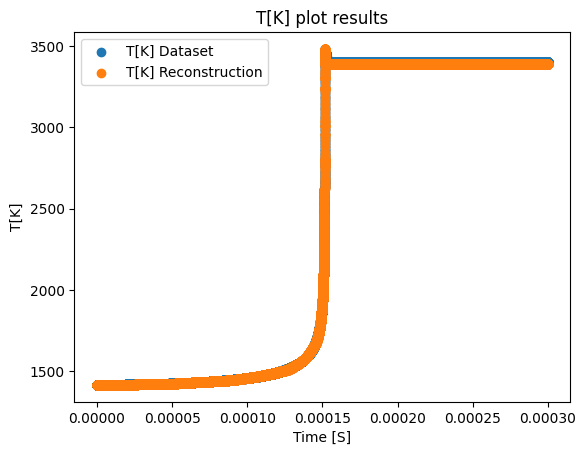

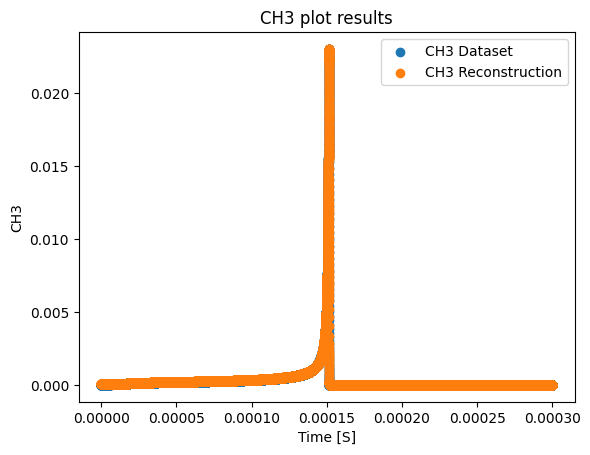

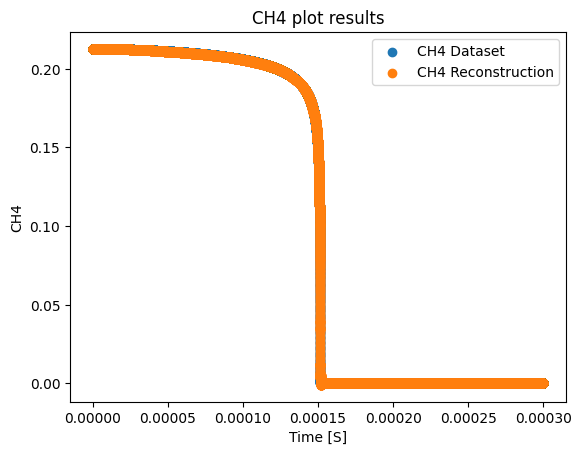

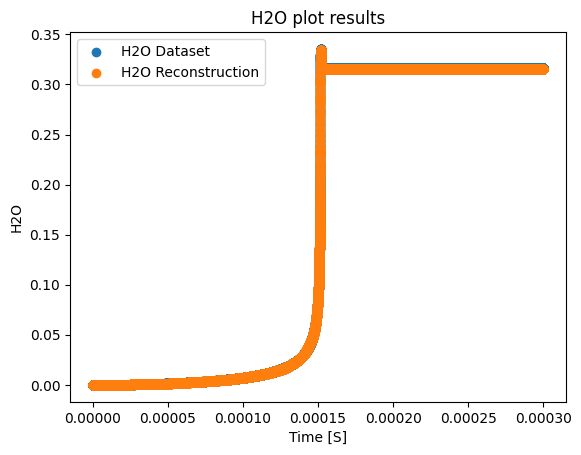

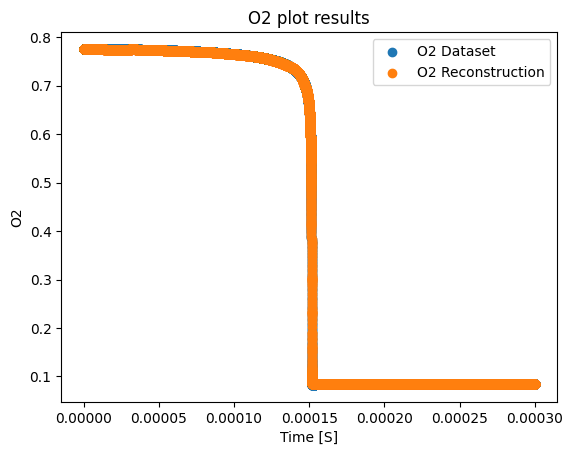

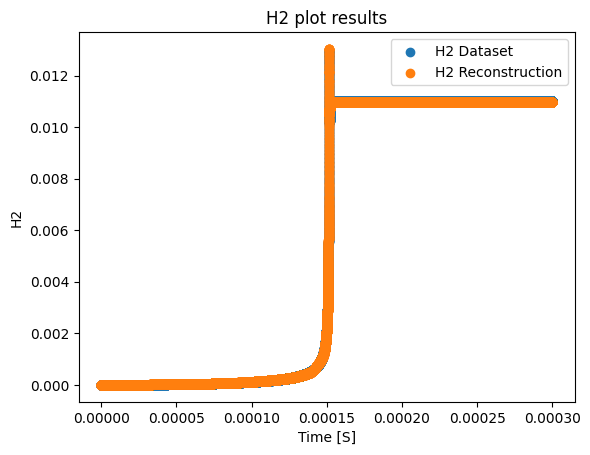

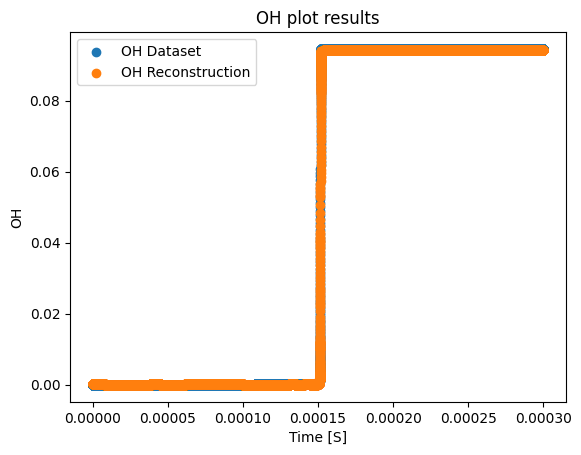

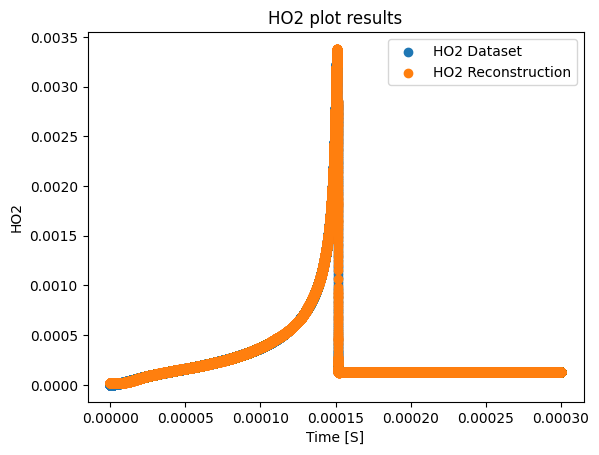

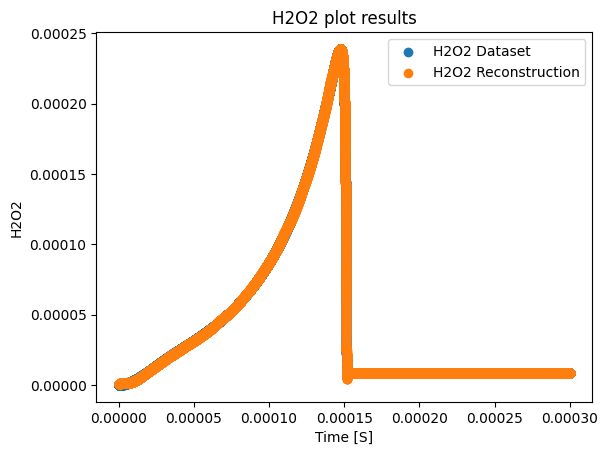

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

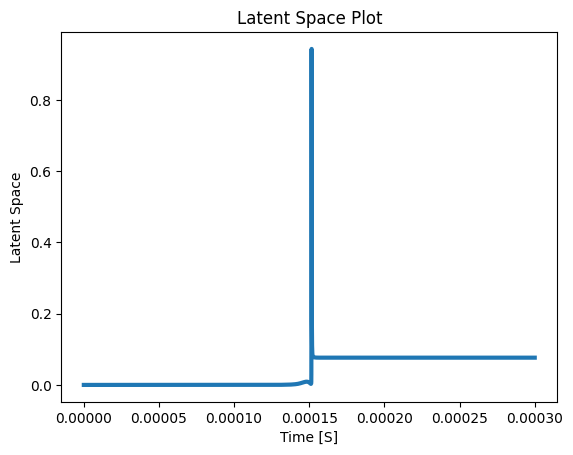

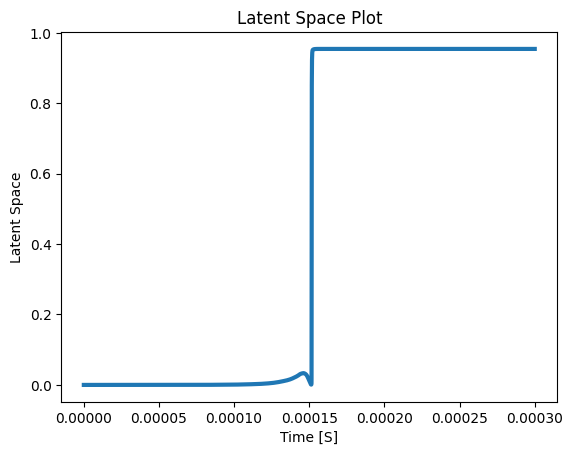

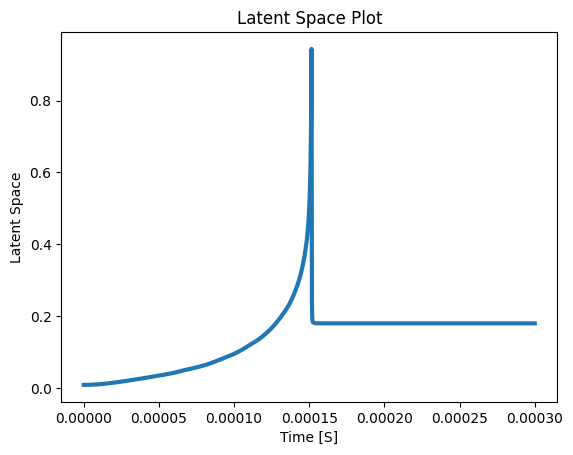

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,2.610608e-11,1.397427e-09,3.607684e-11,0.863420,2.022480e-11,2.893202e-13,0.000001,1.323474e-09,2.771842e-35,...,7.847093e-10,4.890194e-29,2.160576e-17,2.016529e-18,1.405476e-08,1.121198e-05,-8.402797e-04,2.024266e-28,1.404897e-28,7.963398e-30
1,0.405009,1.011965e-10,2.662888e-09,1.364352e-10,0.863420,7.789574e-11,2.148552e-12,0.000002,5.291063e-09,1.295644e-33,...,3.031280e-09,8.142006e-28,8.712544e-17,1.324736e-17,2.847447e-08,1.149972e-05,-8.404976e-04,5.814314e-27,3.662500e-27,2.354438e-28
2,0.405009,2.206981e-10,3.809313e-09,2.902053e-10,0.863420,1.686499e-10,6.978986e-12,0.000004,1.190114e-08,1.234260e-32,...,6.587960e-09,4.191201e-27,1.976912e-16,4.017779e-17,4.325894e-08,1.178630e-05,-8.407172e-04,4.107842e-26,2.586490e-26,1.714075e-27
3,0.405009,3.804132e-10,4.848577e-09,4.878428e-10,0.863420,2.883739e-10,1.603374e-11,0.000005,2.115159e-08,-1.461706e-32,...,1.131649e-08,1.332704e-26,3.544431e-16,8.788603e-17,5.840556e-08,1.207001e-05,-8.409379e-04,1.623689e-25,1.047192e-25,6.975103e-27
4,0.405009,5.765760e-10,5.791354e-09,7.211582e-10,0.863420,4.333004e-10,3.040435e-11,0.000006,3.304028e-08,-1.388233e-32,...,1.709367e-08,3.251758e-26,5.585032e-16,1.604731e-16,7.390981e-08,1.234935e-05,-8.411589e-04,4.660300e-25,3.098850e-25,2.058324e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,1.870763e-06,...,4.924963e-22,3.893585e-24,-4.872426e-25,-1.804271e-28,-1.464592e-29,-4.176878e-31,-1.366814e-32,4.039688e-23,1.822996e-23,2.769103e-24
119995,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,1.870763e-06,...,4.924963e-22,3.893585e-24,-4.872426e-25,-1.804271e-28,-1.464592e-29,-4.176878e-31,-1.366814e-32,4.039688e-23,1.822996e-23,2.769103e-24
119996,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,1.870763e-06,...,4.729149e-22,3.893585e-24,-4.872426e-25,-1.804271e-28,-1.464580e-29,-4.243912e-31,-1.355417e-32,4.039688e-23,1.822996e-23,2.769103e-24
119997,0.970975,7.334362e-01,9.015065e-01,7.209762e-01,0.093358,9.429609e-01,9.131152e-01,0.033487,3.218196e-02,1.870763e-06,...,4.729149e-22,3.893585e-24,-4.868926e-25,-1.768439e-28,-1.464580e-29,-4.243912e-31,-1.355417e-32,4.045589e-23,1.803601e-23,2.770152e-24


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.883269,0.808719,0.807167,0.807069,-0.884252,0.881218,0.887382,0.039480,-0.184262,0.884211,...,-0.316694,-0.314009,-0.315887,-0.315812,-0.316942,-0.381109,-0.109327,-0.314534,-0.314892,-0.314890
1,0.812390,0.880948,0.882404,0.882296,-0.819336,0.823133,0.816182,-0.038270,-0.111742,0.810133,...,-0.242383,-0.245872,-0.246587,-0.246593,-0.244036,-0.310384,-0.032106,-0.246176,-0.246312,-0.246273
2,0.706995,0.637421,0.635877,0.635800,-0.707975,0.704858,0.711110,0.213787,-0.006993,0.717095,...,-0.156073,-0.135698,-0.137578,-0.137503,-0.146751,-0.203144,-0.235547,-0.136223,-0.136571,-0.136572


H2O     0.887382
C       0.884211
T[K]    0.883269
CO2     0.882352
OH      0.881218
Name: 0, dtype: float64
H     0.882404
O     0.882296
H2    0.880948
CO    0.876860
OH    0.823133
Name: 1, dtype: float64
HCO     0.810462
CH      0.745682
C       0.717095
H2O     0.711110
T[K]    0.706995
Name: 2, dtype: float64


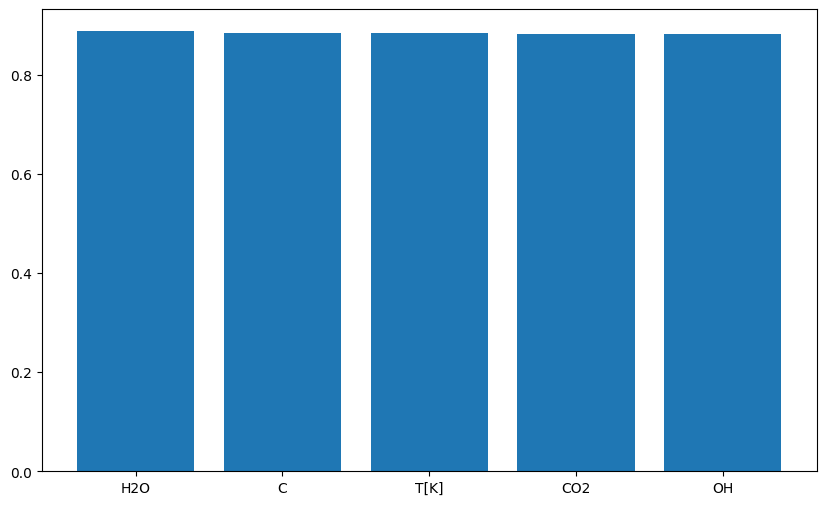

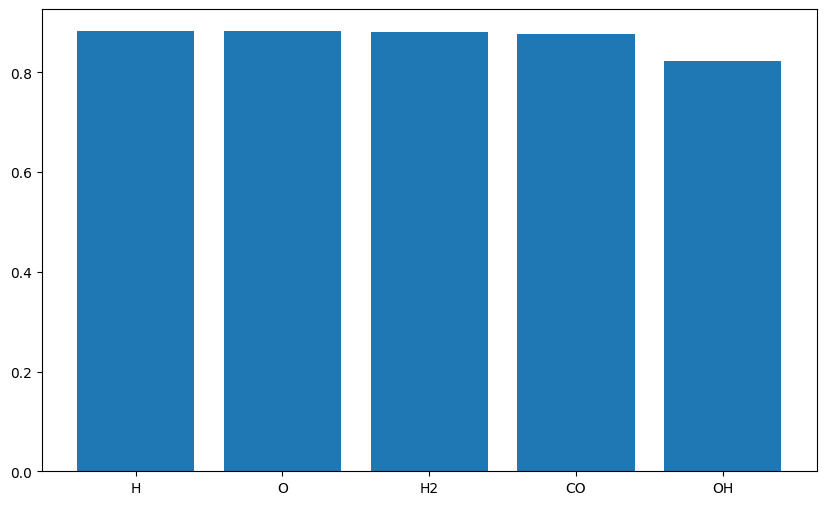

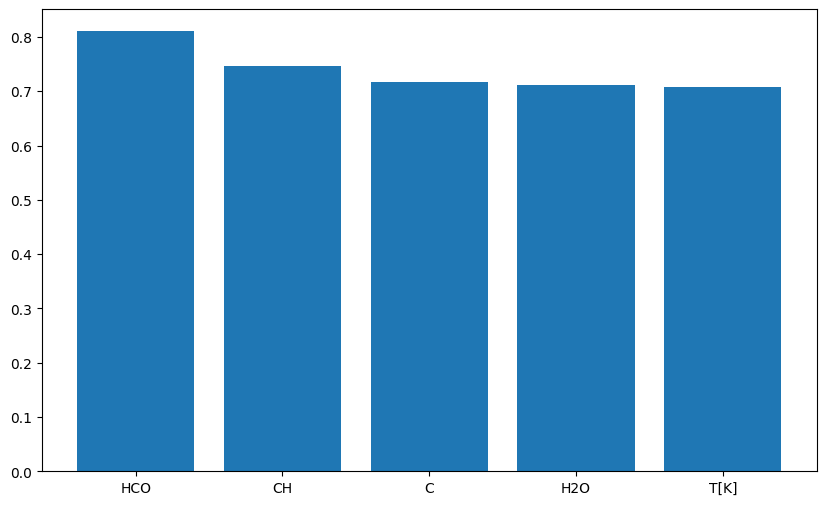

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.949717,0.897402,0.896358,0.896358,-0.947868,0.945513,0.950037,-0.093121,-0.410238,0.947559,...,-0.679929,-0.675729,-0.678828,-0.678723,-0.680339,-0.695432,-0.197878,-0.676659,-0.677248,-0.677220
1,0.903765,0.947184,0.948260,0.948260,-0.906026,0.908395,0.903853,-0.145743,-0.362596,0.897637,...,-0.627055,-0.631141,-0.632677,-0.632685,-0.629189,-0.646961,-0.145145,-0.631789,-0.632080,-0.631996
2,0.807538,0.758472,0.757126,0.757126,-0.805447,0.803050,0.807892,0.195889,-0.088638,0.813379,...,-0.352629,-0.324134,-0.327079,-0.326974,-0.339836,-0.344057,-0.338298,-0.325000,-0.325553,-0.325535


H2O     0.950037
T[K]    0.949717
C       0.947559
CO2     0.946553
OH      0.945513
Name: 0, dtype: float64
H     0.948260
O     0.948260
H2    0.947184
CO    0.944497
OH    0.908395
Name: 1, dtype: float64
HCO     0.892753
CH      0.838885
C       0.813379
H2O     0.807892
T[K]    0.807538
Name: 2, dtype: float64


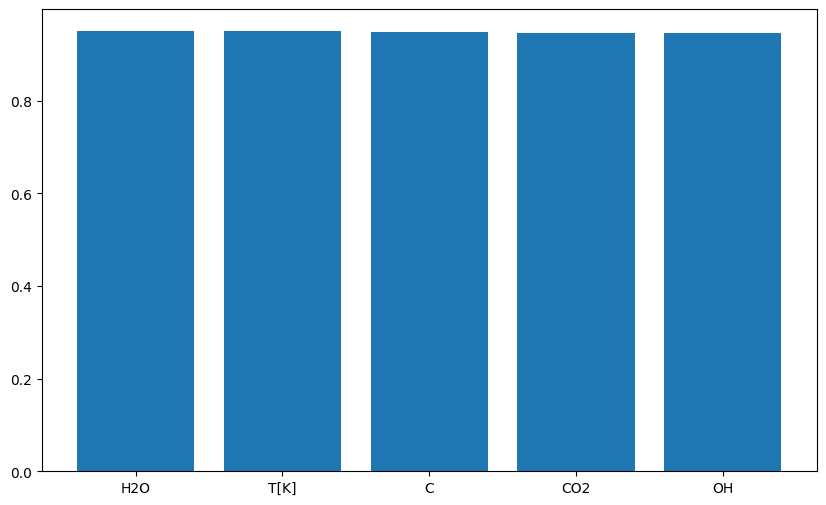

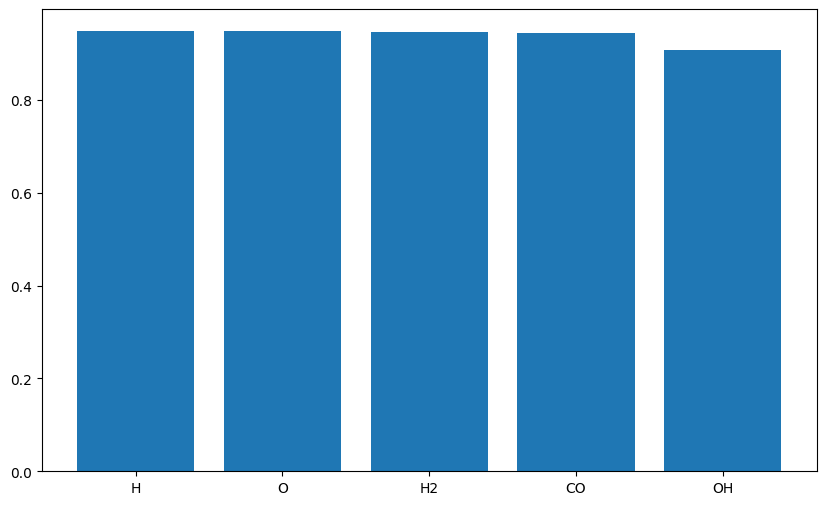

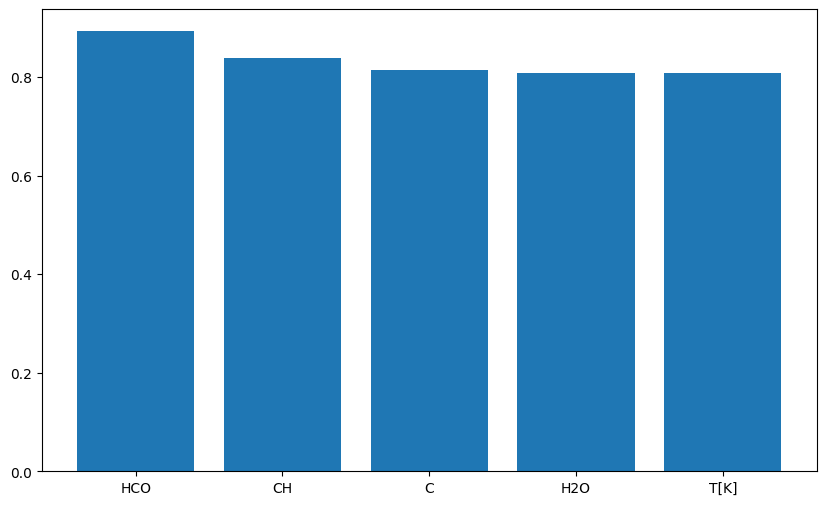

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.883292,0.808722,0.807170,0.807071,-0.884273,0.881239,0.887402,0.039452,-0.184311,0.884195,...,-0.316688,-0.314045,-0.315918,-0.315843,-0.316934,-0.381105,-0.109333,-0.314569,-0.314931,-0.314928
1,0.812376,0.880950,0.882406,0.882299,-0.819320,0.823117,0.816166,-0.038296,-0.111743,0.810117,...,-0.242373,-0.245871,-0.246577,-0.246584,-0.244022,-0.310369,-0.032113,-0.246174,-0.246314,-0.246274
2,0.707020,0.637430,0.635886,0.635809,-0.707997,0.704880,0.711132,0.213755,-0.007040,0.717117,...,-0.156102,-0.135729,-0.137606,-0.137531,-0.146778,-0.203176,-0.235586,-0.136254,-0.136609,-0.136609


H2O     0.887402
C       0.884195
T[K]    0.883292
CO2     0.882373
OH      0.881239
Name: 0, dtype: float64
H     0.882406
O     0.882299
H2    0.880950
CO    0.876862
OH    0.823117
Name: 1, dtype: float64
HCO     0.810486
CH      0.745705
C       0.717117
H2O     0.711132
T[K]    0.707020
Name: 2, dtype: float64


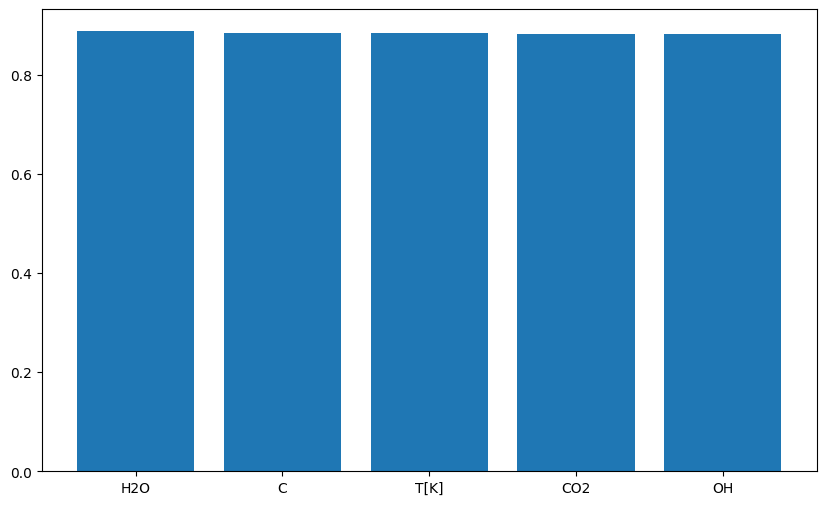

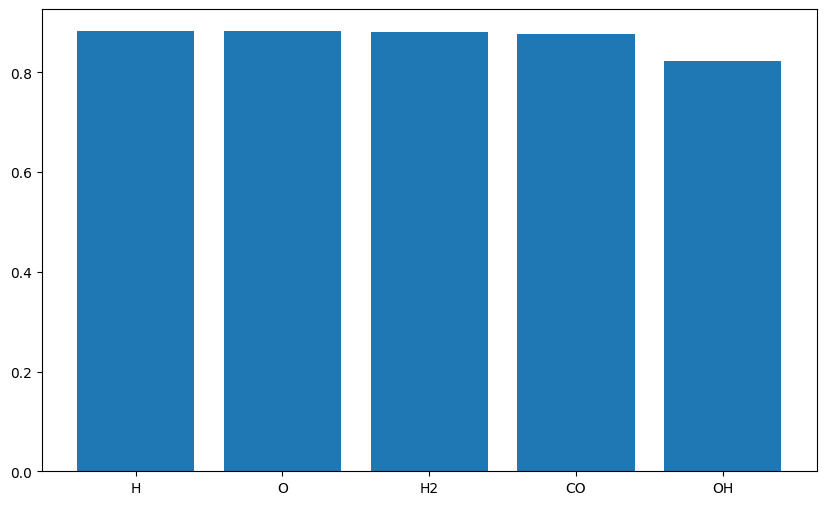

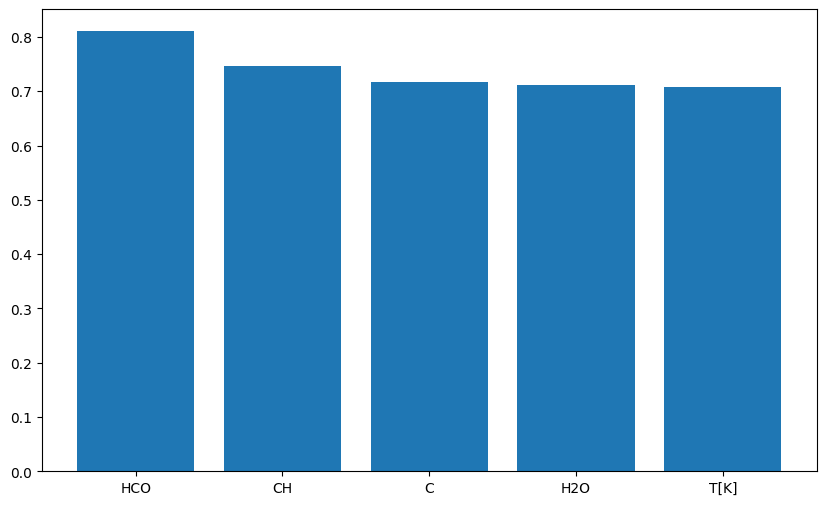

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)